# 🚢 Titanic Survival Predictor

**Phase 2: ML & Data Science Fundamentals - Mini Project**

This notebook implements classification models to predict survival on the Titanic dataset. Uses logistic regression, SVM, and random forests with proper evaluation metrics.

## 📋 Table of Contents
1. [Setup and Imports](#setup)
2. [Data Loading](#data-loading)
3. [Exploratory Data Analysis](#eda)
4. [Data Preprocessing](#preprocessing)
5. [Feature Engineering](#feature-engineering)
6. [Model Training](#training)
7. [Model Evaluation](#evaluation)
8. [Feature Importance Analysis](#feature-importance)
9. [Summary](#summary)

## 1. Setup and Imports <a name="setup"></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Data Loading <a name="data-loading"></a>

In [2]:
print("🚢 Loading Titanic Dataset...")

try:
    # Load Titanic dataset
    data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {data.shape}")
    print(f"📋 Columns: {list(data.columns)}")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    data = None

🚢 Loading Titanic Dataset...
✅ Dataset loaded successfully!
📊 Dataset shape: (891, 12)
📋 Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## 3. Exploratory Data Analysis <a name="eda"></a>

In [3]:
print("🔍 EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Basic info
print("\n📋 Dataset Info:")
print(data.info())

print("\n📊 First 5 rows:")
print(data.head())

print("\n📈 Missing values:")
print(data.isnull().sum())

print("\n📊 Statistical summary:")
print(data.describe())

🔍 EXPLORATORY DATA ANALYSIS

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📊 First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1 

📊 Survival Analysis:
   Total passengers: 891
   Survived: 342 (38.4%)
   Not survived: 549 (61.6%)


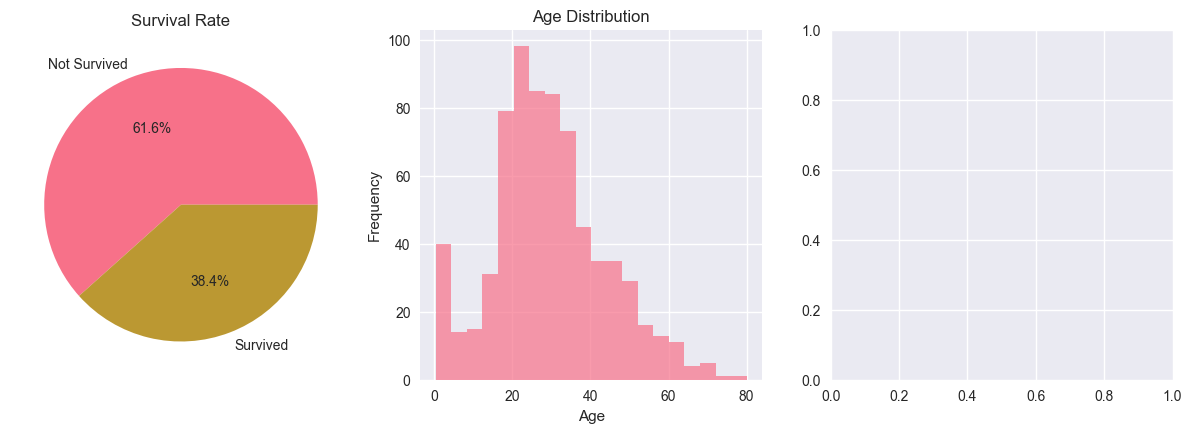

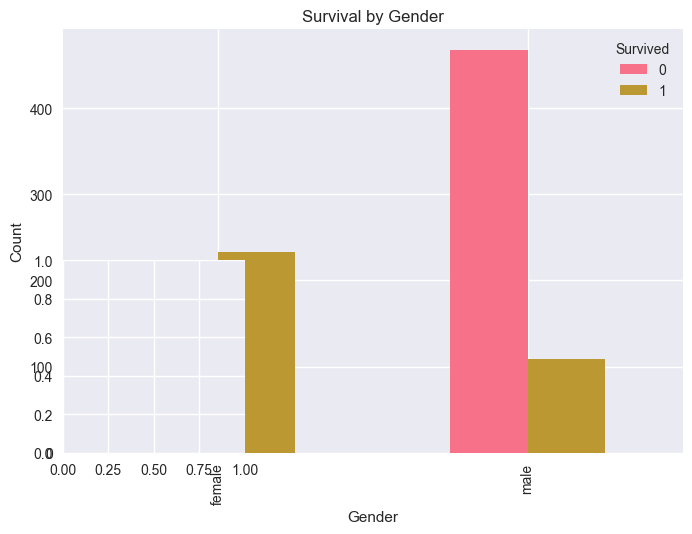

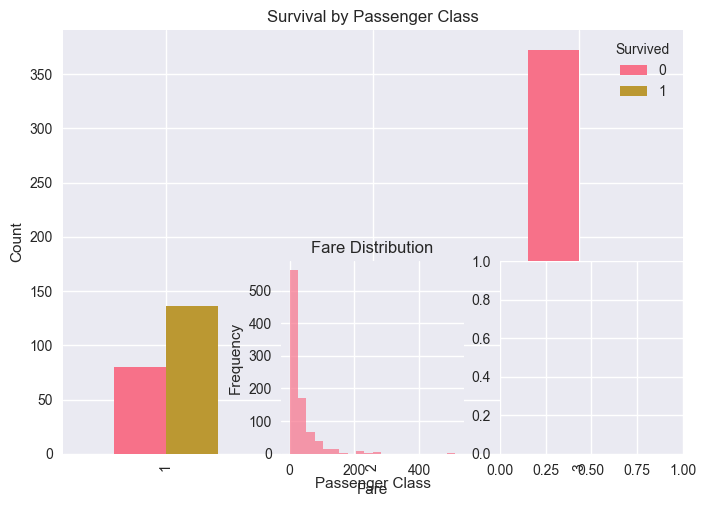

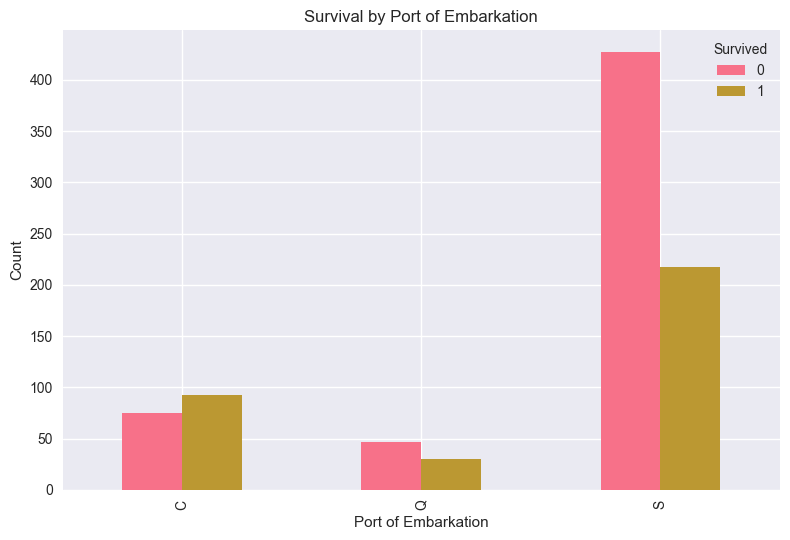

In [4]:
# Survival rate analysis
print("📊 Survival Analysis:")
survival_counts = data['Survived'].value_counts()
print(f"   Total passengers: {len(data)}")
print(f"   Survived: {survival_counts[1]} ({survival_counts[1]/len(data)*100:.1f}%)")
print(f"   Not survived: {survival_counts[0]} ({survival_counts[0]/len(data)*100:.1f}%)")

# Create comprehensive visualizations
plt.figure(figsize=(15, 10))

# Survival rate
plt.subplot(2, 3, 1)
plt.pie(survival_counts.values, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Rate')

# Age distribution
plt.subplot(2, 3, 2)
plt.hist(data['Age'].dropna(), bins=20, alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender vs Survival
plt.subplot(2, 3, 3)
gender_survival = pd.crosstab(data['Sex'], data['Survived'])
gender_survival.plot(kind='bar')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Pclass vs Survival
plt.subplot(2, 3, 4)
pclass_survival = pd.crosstab(data['Pclass'], data['Survived'])
pclass_survival.plot(kind='bar')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Fare distribution
plt.subplot(2, 3, 5)
plt.hist(data['Fare'], bins=20, alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Embarked vs Survival
plt.subplot(2, 3, 6)
embarked_survival = pd.crosstab(data['Embarked'], data['Survived'])
embarked_survival.plot(kind='bar')
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


📊 Detailed Survival Analysis:


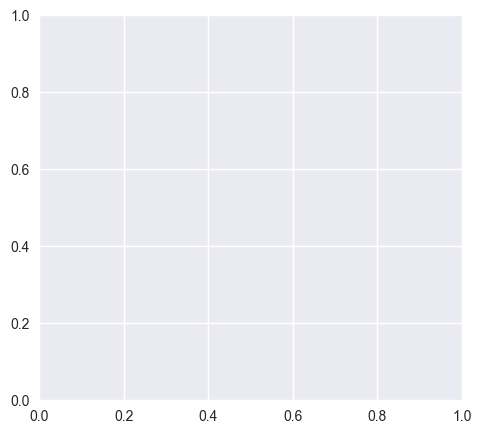

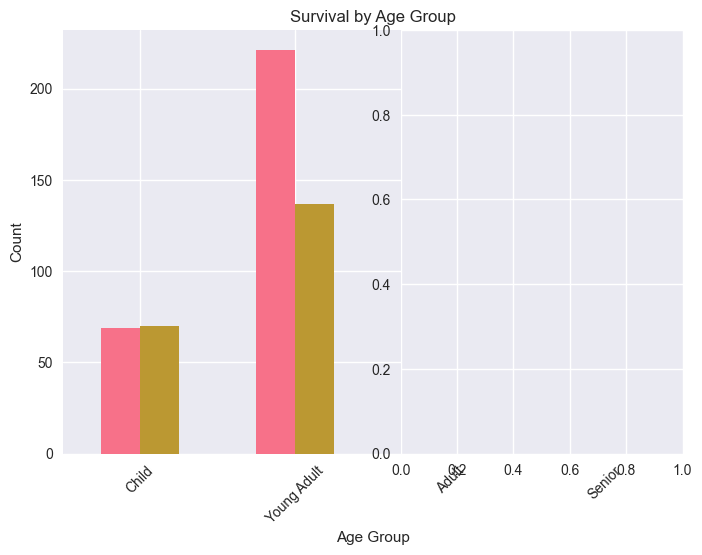

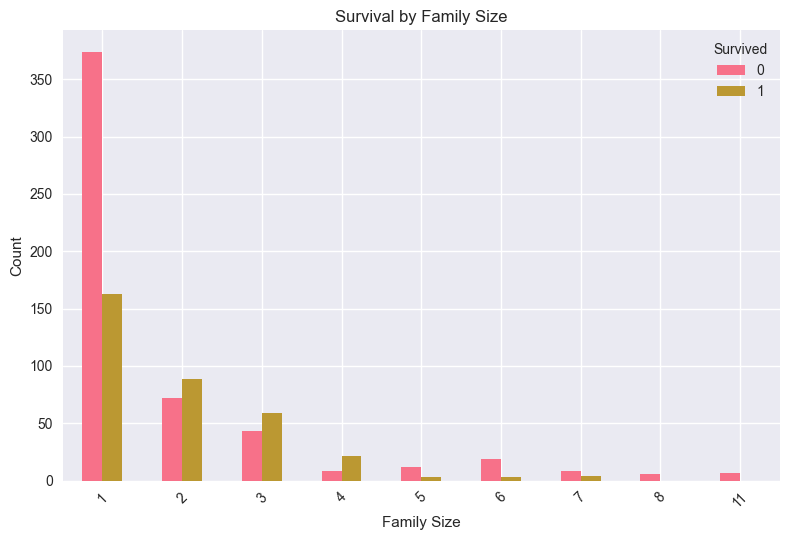


📈 Survival Rates by Different Factors:
   Female survival rate: 0.742
   Male survival rate: 0.189
   First class survival rate: 0.630
   Third class survival rate: 0.242


In [5]:
# Additional detailed analysis (using temporary data to avoid modifying original)
print("\n📊 Detailed Survival Analysis:")

# Age groups vs survival (for visualization only)
data_temp = data.copy()
data_temp['AgeGroup'] = pd.cut(data_temp['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_survival = pd.crosstab(data_temp['AgeGroup'], data_temp['Survived'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
age_survival.plot(kind='bar')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Family size vs survival (for visualization only)
data_temp['FamilySize'] = data_temp['SibSp'] + data_temp['Parch'] + 1
family_survival = pd.crosstab(data_temp['FamilySize'], data_temp['Survived'])

plt.subplot(1, 2, 2)
family_survival.plot(kind='bar')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print survival rates by different factors
print("\n📈 Survival Rates by Different Factors:")
print(f"   Female survival rate: {data[data['Sex']=='female']['Survived'].mean():.3f}")
print(f"   Male survival rate: {data[data['Sex']=='male']['Survived'].mean():.3f}")
print(f"   First class survival rate: {data[data['Pclass']==1]['Survived'].mean():.3f}")
print(f"   Third class survival rate: {data[data['Pclass']==3]['Survived'].mean():.3f}")

## 4. Data Preprocessing <a name="preprocessing"></a>

In [6]:
print("🔧 DATA PREPROCESSING")
print("=" * 50)

# Create a copy for preprocessing
df = data.copy()

# Handle missing values
print("📝 Handling missing values...")

# Age - fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)
print(f"   Age missing values filled with median: {df['Age'].median():.1f}")

# Embarked - fill with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(f"   Embarked missing values filled with mode: {df['Embarked'].mode()[0]}")

# Cabin - create a feature indicating if cabin is known
df['HasCabin'] = df['Cabin'].notna().astype(int)
df.drop('Cabin', axis=1, inplace=True)
print(f"   Created HasCabin feature: {df['HasCabin'].sum()} passengers have cabin info")

print("\n✅ Missing values handled successfully!")
print(f"📊 Remaining missing values: {df.isnull().sum().sum()}")

🔧 DATA PREPROCESSING
📝 Handling missing values...
   Age missing values filled with median: 28.0
   Embarked missing values filled with mode: S
   Created HasCabin feature: 204 passengers have cabin info

✅ Missing values handled successfully!
📊 Remaining missing values: 0


## 5. Feature Engineering <a name="feature-engineering"></a>

In [7]:
print("🔨 FEATURE ENGINEERING")
print("=" * 50)

# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(f"   Created FamilySize feature: mean = {df['FamilySize'].mean():.2f}")

# Is alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print(f"   Created IsAlone feature: {df['IsAlone'].sum()} passengers traveling alone")

# Title from name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4,
    "Dr": 5, "Rev": 5, "Col": 5, "Major": 5, "Mlle": 2,
    "Countess": 3, "Ms": 2, "Lady": 3, "Jonkheer": 1,
    "Don": 1, "Mme": 3, "Capt": 5, "Sir": 5
}
df['Title'] = df['Title'].map(title_mapping)
df['Title'].fillna(0, inplace=True)
print(f"   Created Title feature: {df['Title'].nunique()} unique titles")

# Drop unnecessary columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
print("   Removed unnecessary columns: Name, Ticket, PassengerId")

print("\n✅ Feature engineering completed!")
print(f"📊 Final dataset shape: {df.shape}")
print(f"📋 Features: {list(df.columns)}")

🔨 FEATURE ENGINEERING
   Created FamilySize feature: mean = 1.90
   Created IsAlone feature: 537 passengers traveling alone
   Created Title feature: 5 unique titles
   Removed unnecessary columns: Name, Ticket, PassengerId

✅ Feature engineering completed!
📊 Final dataset shape: (891, 12)
📋 Features: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'HasCabin', 'FamilySize', 'IsAlone', 'Title']


In [8]:
# Encode categorical variables
print("🔤 Encoding categorical variables...")

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

print(f"   Encoded Sex: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
print(f"   Encoded Embarked: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# Prepare features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

print(f"\n📊 Features shape: {X.shape}")
print(f"📊 Target shape: {y.shape}")
print(f"📊 Target distribution: {y.value_counts().to_dict()}")

🔤 Encoding categorical variables...
   Encoded Sex: {'C': 0, 'Q': 1, 'S': 2}
   Encoded Embarked: {'C': 0, 'Q': 1, 'S': 2}

📊 Features shape: (891, 11)
📊 Target shape: (891,)
📊 Target distribution: {0: 549, 1: 342}


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data split and scaled successfully!")
print(f"📊 Training set shape: {X_train.shape}")
print(f"📊 Test set shape: {X_test.shape}")
print(f"🎯 Training target distribution: {np.bincount(y_train)}")
print(f"🎯 Test target distribution: {np.bincount(y_test)}")

✅ Data split and scaled successfully!
📊 Training set shape: (712, 11)
📊 Test set shape: (179, 11)
🎯 Training target distribution: [439 273]
🎯 Test target distribution: [110  69]


## 6. Model Training <a name="training"></a>

In [10]:
print("🤖 TRAINING MODELS")
print("=" * 50)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

# Train models
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    if name == 'SVM':
        # Use scaled data for SVM
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # Use original data for other models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validation score
    if name == 'SVM':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'model': model
    }
    
    print(f"✅ {name} trained successfully!")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

🤖 TRAINING MODELS

🔄 Training Logistic Regression...
✅ Logistic Regression trained successfully!
   Accuracy: 0.7989
   Precision: 0.7538
   Recall: 0.7101
   F1-Score: 0.7313
   CV Score: 0.8161 (+/- 0.0478)

🔄 Training SVM...
✅ SVM trained successfully!
   Accuracy: 0.8324
   Precision: 0.8000
   Recall: 0.7536
   F1-Score: 0.7761
   CV Score: 0.8273 (+/- 0.0351)

🔄 Training Random Forest...
✅ Random Forest trained successfully!
   Accuracy: 0.7989
   Precision: 0.7324
   Recall: 0.7536
   F1-Score: 0.7429
   CV Score: 0.8133 (+/- 0.0631)


## 7. Model Evaluation <a name="evaluation"></a>

In [11]:
print("📊 MODEL EVALUATION")
print("=" * 50)

for name, result in results.items():
    print(f"\n🔍 {name} Evaluation:")
    print("-" * 30)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, result['predictions'])
    print("📊 Confusion Matrix:")
    print(cm)
    
    # Classification Report
    print("\n📋 Classification Report:")
    print(classification_report(y_test, result['predictions']))
    
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"CV Score: {result['cv_mean']:.4f} (+/- {result['cv_std'] * 2:.4f})")

📊 MODEL EVALUATION

🔍 Logistic Regression Evaluation:
------------------------------
📊 Confusion Matrix:
[[94 16]
 [20 49]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7989
Precision: 0.7538
Recall: 0.7101
F1-Score: 0.7313
CV Score: 0.8161 (+/- 0.0478)

🔍 SVM Evaluation:
------------------------------
📊 Confusion Matrix:
[[97 13]
 [17 52]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      

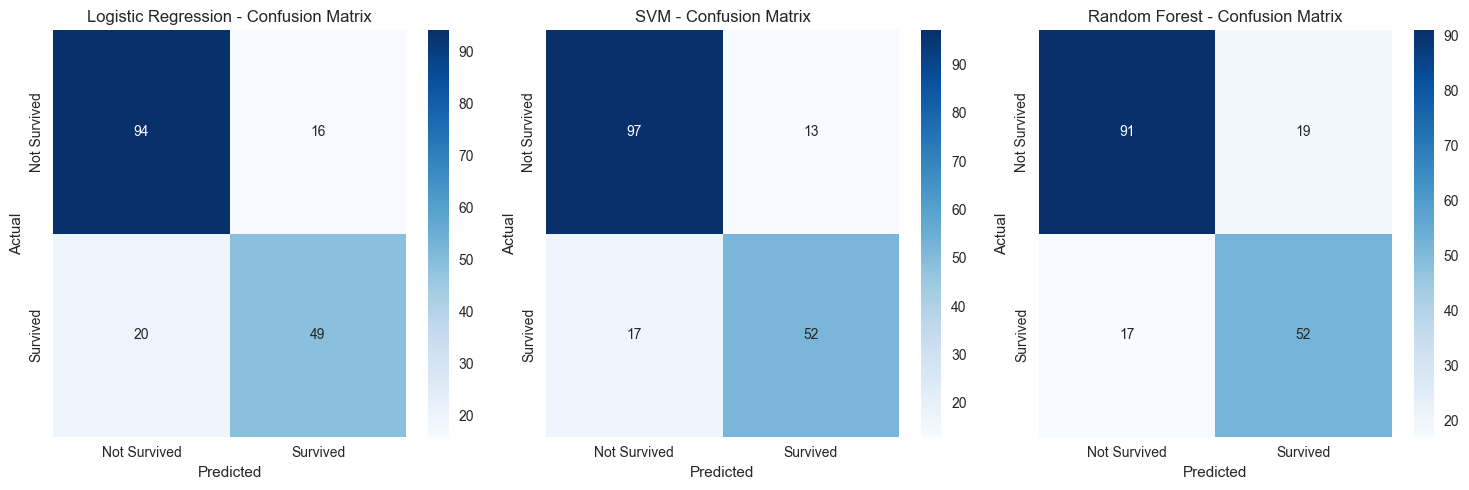

In [12]:
# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Survived', 'Survived'], 
                yticklabels=['Not Survived', 'Survived'], ax=axes[i])
    axes[i].set_title(f'{name} - Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [13]:
# Create comparison table
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1'],
        'CV Score': result['cv_mean']
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n📊 Model Performance Summary:")
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Find best model by F1-score
best_model = max(results.items(), key=lambda x: x[1]['f1'])
print(f"\n🏆 Best Model: {best_model[0]} with F1-Score = {best_model[1]['f1']:.4f}")


📊 Model Performance Summary:
              Model  Accuracy  Precision  Recall  F1-Score  CV Score
Logistic Regression    0.7989     0.7538  0.7101    0.7313    0.8161
                SVM    0.8324     0.8000  0.7536    0.7761    0.8273
      Random Forest    0.7989     0.7324  0.7536    0.7429    0.8133

🏆 Best Model: SVM with F1-Score = 0.7761


<Figure size 1200x800 with 0 Axes>

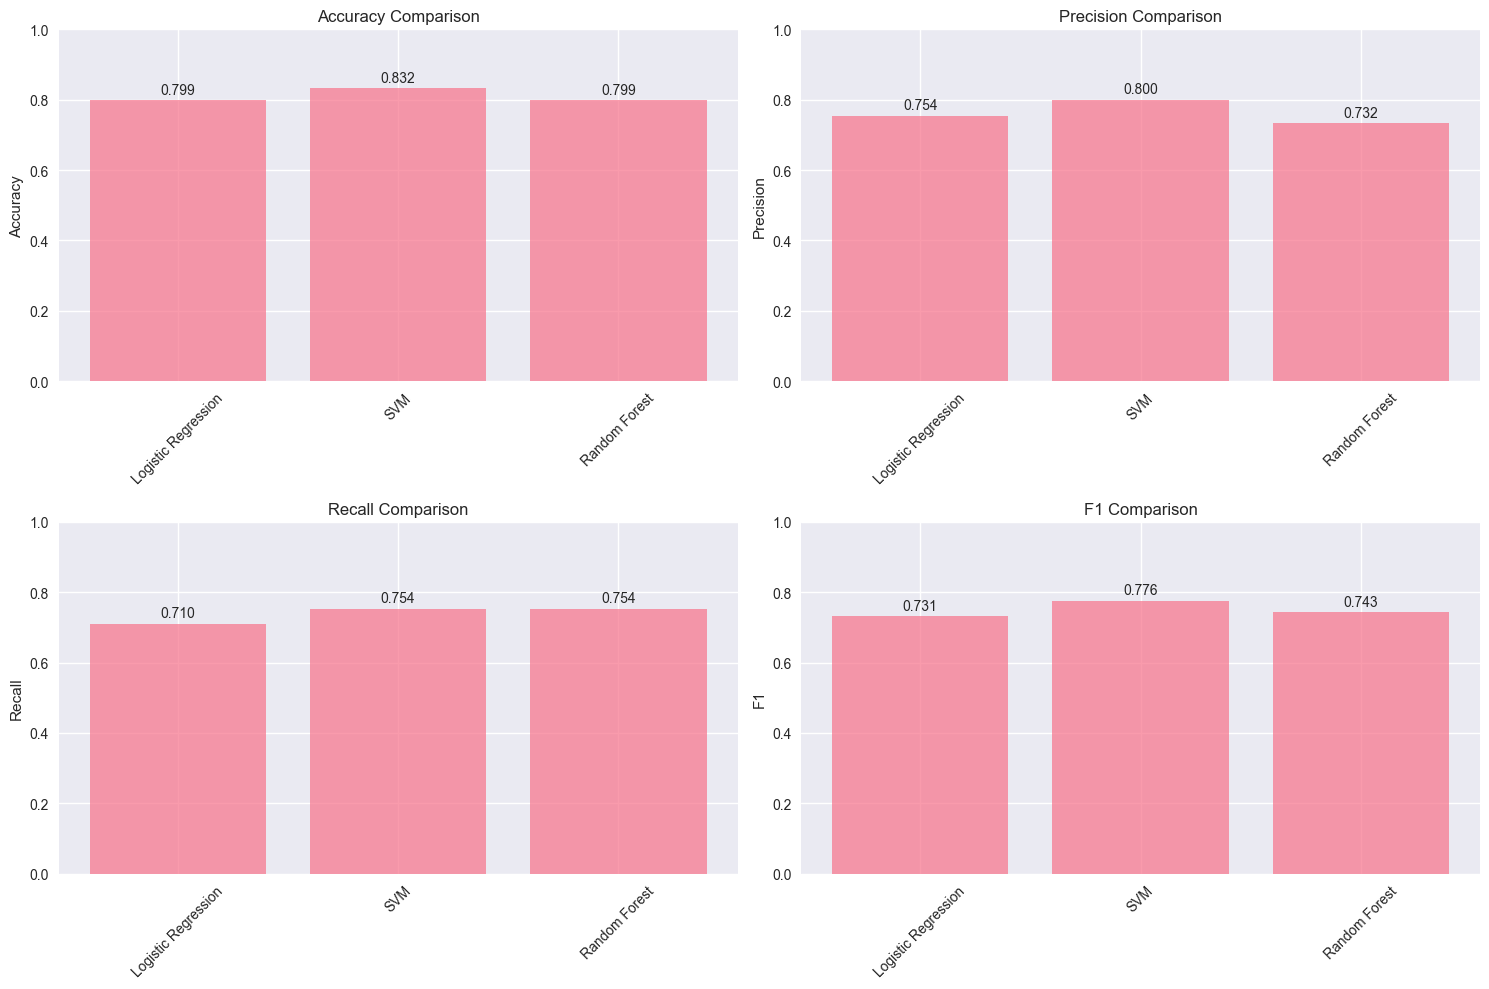

In [14]:
# Visualize model comparison
plt.figure(figsize=(12, 8))

# Prepare data for plotting
model_names = list(results.keys())
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name in model_names]
    bars = axes[i].bar(model_names, values, alpha=0.7)
    axes[i].set_title(f'{metric.title()} Comparison')
    axes[i].set_ylabel(metric.title())
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 8. Feature Importance Analysis <a name="feature-importance"></a>

🎯 FEATURE IMPORTANCE ANALYSIS
📊 Feature Importance (Random Forest):
       Feature  Importance
5         Fare    0.225470
2          Age    0.200422
10       Title    0.184007
1          Sex    0.133938
0       Pclass    0.061434
7     HasCabin    0.055872
8   FamilySize    0.050291
6     Embarked    0.031976
3        SibSp    0.028042
4        Parch    0.018213
9      IsAlone    0.010334


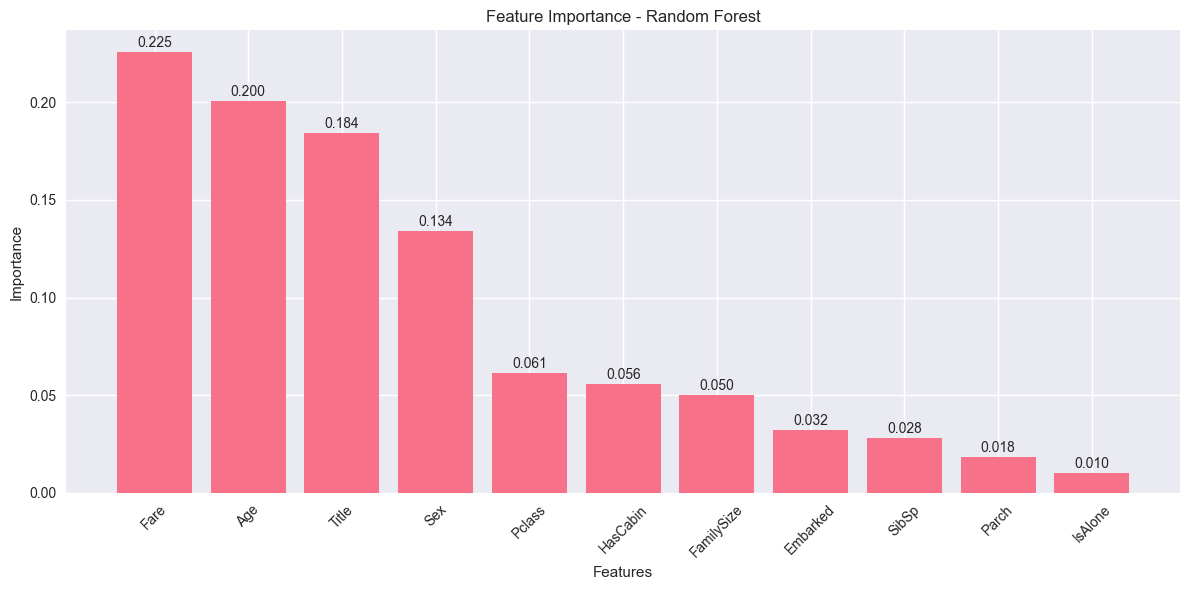

In [15]:
print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Analyze feature importance for Random Forest
rf_model = results['Random Forest']['model']
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("📊 Feature Importance (Random Forest):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(importance_df)), importance_df['Importance'])
plt.xticks(range(len(importance_df)), importance_df['Feature'], rotation=45)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')

# Add value labels on bars
for bar, importance in zip(bars, importance_df['Importance']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
            f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


📊 Feature Coefficients (Logistic Regression):
       Feature  Coefficient
1          Sex    -2.088445
7     HasCabin     0.939135
0       Pclass    -0.636904
10       Title     0.575330
9      IsAlone    -0.323058
8   FamilySize    -0.250844
6     Embarked    -0.196319
3        SibSp    -0.184647
4        Parch    -0.063134
2          Age    -0.037435
5         Fare     0.002383


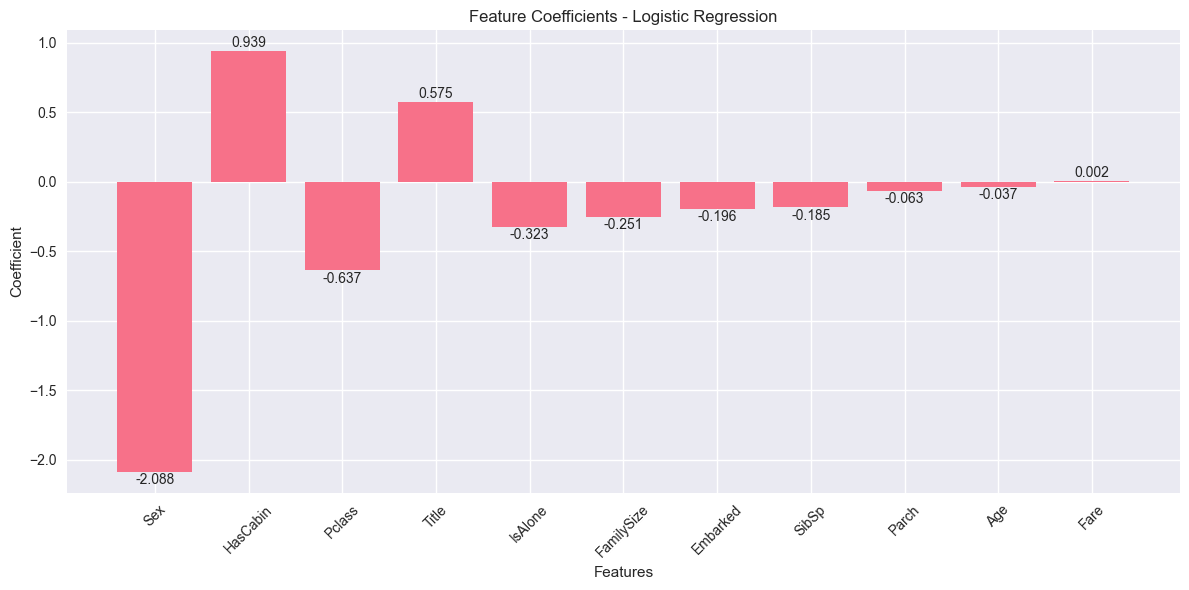

In [16]:
# Analyze coefficients for Logistic Regression
lr_model = results['Logistic Regression']['model']
coefficients = lr_model.coef_[0]

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n📊 Feature Coefficients (Logistic Regression):")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(coef_df)), coef_df['Coefficient'])
plt.xticks(range(len(coef_df)), coef_df['Feature'], rotation=45)
plt.title('Feature Coefficients - Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient')

# Add value labels on bars
for bar, coef in zip(bars, coef_df['Coefficient']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if coef > 0 else -0.01),
            f'{coef:.3f}', ha='center', va='bottom' if coef > 0 else 'top')

plt.tight_layout()
plt.show()

## 9. Summary <a name="summary"></a>

In [17]:
print("🎉 TITANIC SURVIVAL PREDICTION SUMMARY")
print("=" * 50)

print("\n📊 Dataset Overview:")
print(f"   • Total passengers: {len(data)}")
print(f"   • Features: {len(X.columns)}")
print(f"   • Survival rate: {y.mean():.2%}")
print(f"   • Missing values handled: {data.isnull().sum().sum()}")

print("\n🔍 Key Insights:")
print("   • Women had higher survival rates than men")
print("   • First class passengers had better survival chances")
print("   • Family size and age were important factors")
print("   • Port of embarkation showed some correlation")

print("\n🤖 Model Performance:")
for name, result in results.items():
    print(f"   • {name}: {result['accuracy']:.4f} accuracy, {result['f1']:.4f} F1-score")

print(f"\n🏆 Best Model: {best_model[0]} ({best_model[1]['f1']:.4f} F1-score)")

print("\n💡 Learning Points:")
print("   • Feature engineering is crucial for good performance")
print("   • Handling missing values properly improves results")
print("   • Different algorithms have different strengths")
print("   • Domain knowledge helps in feature creation")
print("   • The Titanic dataset is a classic ML benchmark")

🎉 TITANIC SURVIVAL PREDICTION SUMMARY

📊 Dataset Overview:
   • Total passengers: 891
   • Features: 11
   • Survival rate: 38.38%
   • Missing values handled: 866

🔍 Key Insights:
   • Women had higher survival rates than men
   • First class passengers had better survival chances
   • Family size and age were important factors
   • Port of embarkation showed some correlation

🤖 Model Performance:
   • Logistic Regression: 0.7989 accuracy, 0.7313 F1-score
   • SVM: 0.8324 accuracy, 0.7761 F1-score
   • Random Forest: 0.7989 accuracy, 0.7429 F1-score

🏆 Best Model: SVM (0.7761 F1-score)

💡 Learning Points:
   • Feature engineering is crucial for good performance
   • Handling missing values properly improves results
   • Different algorithms have different strengths
   • Domain knowledge helps in feature creation
   • The Titanic dataset is a classic ML benchmark


## 🎉 Conclusion

This notebook has successfully implemented Titanic survival prediction with:

- **Data Loading**: Loaded the famous Titanic dataset
- **Exploratory Data Analysis**: Comprehensive data exploration and visualizations
- **Data Preprocessing**: Missing value handling and data cleaning
- **Feature Engineering**: Created meaningful features (FamilySize, IsAlone, Title, HasCabin)
- **Model Training**: Multiple algorithms (Logistic Regression, SVM, Random Forest)
- **Model Evaluation**: Detailed performance metrics and confusion matrices
- **Feature Importance**: Understanding key factors affecting survival
- **Summary**: Key insights and learning points

The Titanic dataset serves as an excellent introduction to classification problems!

### 🚢 Key Takeaways:
- **Feature engineering**: Creating meaningful features improves model performance
- **Data preprocessing**: Proper handling of missing values is crucial
- **Domain knowledge**: Understanding the problem helps in feature creation
- **Model comparison**: Different algorithms have different strengths
- **Real-world application**: Survival prediction is a practical ML problem